# Tarea Final:
##### Integrantes:
   * _Jhonatan S. Blanco | 2211497_
   * _Juan Celis | 2210715_
   * _María F. Estupiñan | 2210727_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lectura de datos.
Gi = pd.read_csv("Global_intensity.csv", index_col=("Datetime"))
Gap = pd.read_csv("Global_active_power.csv", index_col=("Datetime"))
Grp = pd.read_csv("Global_reactive_power.csv", index_col=("Datetime"))
V = pd.read_csv("Voltage.csv", index_col=("Datetime"))

#Concatenación de tablas.
data = Gi.merge(Gap, on='Datetime').merge(Grp, on = "Datetime").merge(V, on = "Datetime")
data = data.dropna() #Eliminar espacios vacios.

In [3]:
#Se convierten los datos a vatios/hora
data["Global_active_power"] = round(data["Global_active_power"]*1000/60, 3)
data["Global_reactive_power"] = round(data["Global_reactive_power"]*1000/60, 3)
data

,Global_intensity,Global_active_power,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01 00:00:00,7.4,29.833,3.933,240.65
2010-01-01 00:01:00,7.4,29.667,3.900,240.07
2010-01-01 00:02:00,7.4,29.667,3.900,240.15
2010-01-01 00:03:00,7.2,29.100,3.100,240.26
2010-01-01 00:04:00,7.0,28.100,1.700,240.12
...,...,...,...,...
2010-11-26 20:58:00,4.0,15.767,0.000,240.43
2010-11-26 20:59:00,4.0,15.733,0.000,240.00
2010-11-26 21:00:00,3.8,15.633,0.000,239.82


# Tablas

In [4]:
#Minutos
data

,Global_intensity,Global_active_power,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01 00:00:00,7.4,29.833,3.933,240.65
2010-01-01 00:01:00,7.4,29.667,3.900,240.07
2010-01-01 00:02:00,7.4,29.667,3.900,240.15
2010-01-01 00:03:00,7.2,29.100,3.100,240.26
2010-01-01 00:04:00,7.0,28.100,1.700,240.12
...,...,...,...,...
2010-11-26 20:58:00,4.0,15.767,0.000,240.43
2010-11-26 20:59:00,4.0,15.733,0.000,240.00
2010-11-26 21:00:00,3.8,15.633,0.000,239.82


In [5]:
#Se resetea el index para que "Datetime" se vuelva una columna y así darle
#el formato para hacer el resample.
data = data.reset_index()
data["Datetime"] = pd.to_datetime(data['Datetime'])
data = data.set_index('Datetime')

In [6]:
#Días
data_d = data.resample('D').mean()
data_d

,Global_intensity,Global_active_power,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01,3.537083,14.169592,1.913614,242.565722
2010-01-02,4.857778,19.603921,1.444256,243.631743
2010-01-03,3.757778,15.031576,1.505511,241.822778
2010-01-04,4.879028,19.530563,1.672035,241.754160
2010-01-05,3.929861,15.279607,2.228298,240.647167
...,...,...,...,...
2010-12-07,3.397222,12.842301,3.309176,240.218646
2010-12-08,1.623750,6.130765,1.957152,240.794931
2010-12-09,4.755694,18.658474,2.330551,241.619722


In [7]:
#Meses
data_m = data.resample('M').mean()
data_m

,Global_intensity,Global_active_power,Global_reactive_power,Voltage
Datetime,,,,
2010-01-31,5.430332,21.677334,2.086377,242.338522
2010-02-28,4.836624,19.292318,1.824457,242.002101
2010-03-31,4.920399,19.500255,2.272798,241.475284
2010-04-30,4.363496,17.272230,2.159279,241.442527
2010-05-31,4.551504,17.932618,2.120356,241.296151
2010-06-30,4.170282,16.255105,2.425415,240.888985
2010-07-31,3.337202,12.982458,2.301545,240.965167
2010-08-31,3.954423,15.490872,2.180260,241.422944
2010-09-30,4.223837,16.625685,2.128339,241.267517


# Visualización de datos

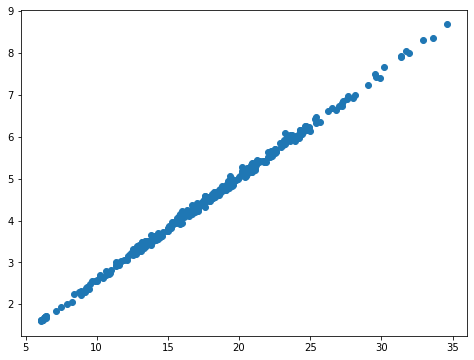

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(data_d["Global_active_power"], data_d["Global_intensity"])
plt.show()

# Ajuste de curvas

In [9]:
from scipy.optimize import curve_fit

In [10]:
def func(x, a, b):
    return a*x + b
def func2(X, a1, a2, b):
    x1, x2 = X
    return a1*x1 + a2*x2 + b
    

[ 4.05096571 -0.4588698 ] [[ 0.00010015 -0.00044889]
 [-0.00044889  0.00221266]]


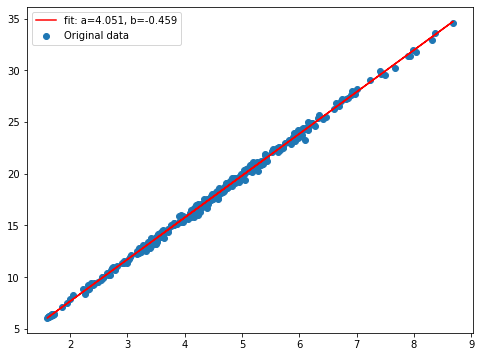

In [11]:
data_d = data_d.dropna()
popt1, pcov1 = curve_fit(func, data_d["Global_intensity"], data_d["Global_active_power"])
print(popt1, pcov1)

plt.figure(figsize=(8,6))
plt.plot(data_d["Global_intensity"], func(data_d["Global_intensity"], *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(data_d["Global_intensity"],data_d["Global_active_power"],label="Original data")
plt.legend()
plt.show()

In [16]:
#Automatización de gráficas con el ajuste.
def get_fit(func,xdata,ydata,labelx,labely, r, title = None, D3 = False, labelz = None):
    
    popt, pcov = curve_fit(func, xdata, ydata)
    #Error
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    
    
    if D3 == False:
        x=np.linspace(xdata.min(),xdata.max(),100)
        plt.figure(figsize=(8,6))
        plt.plot(x, func(x, *popt), 'r-',label= "Curve_fit")
        plt.scatter(xdata,ydata,label="Original data")

        plt.title(title, fontsize=16)
        plt.xlabel(labelx)
        plt.ylabel(labely)
        plt.legend()

        plt.grid(linestyle=':', linewidth=1.5)
        plt.show()
    else:
        fig = plt.figure()
        ax = plt.axes(projection='3d')

        x = np.linspace(xdata[0].min(),xdata[0].max(),100)
        y = np.linspace(xdata[1].min(),xdata[1].max(),100)
        z = func2((x, y), *popt)
        
        ax.set_title(title, fontsize=16)
        ax.set_xlabel(labelx)
        ax.set_ylabel(labely)
        ax.set_zlabel(labelz)
        # Data for a three-dimensional line
        ax.plot3D(x, y, z, "red", label= "Curve_fit")
        ax.scatter3D(xdata[0], xdata[1], ydata, label= "Original data")
        plt.legend()
        #ax.view_init(0, 80)
    
    #Visualización de coeficientes.
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    
    #visualización de error.
    print("Error on fit is ={}".format(round(E, r + 1)))

# Relación 1: 
$Global$_$active$_$power$ = $A1(Global$_$intensity) + B1$

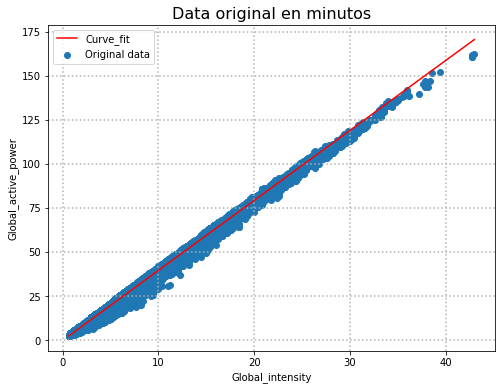

Coeficients are : [ 3.967 -0.083]
Sigma_Coeficients are : [0.    0.002]
Error on fit is =0.8209


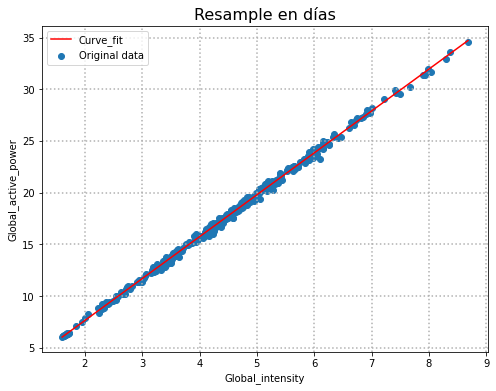

Coeficients are : [ 4.051 -0.459]
Sigma_Coeficients are : [0.01  0.047]
Error on fit is =0.2537


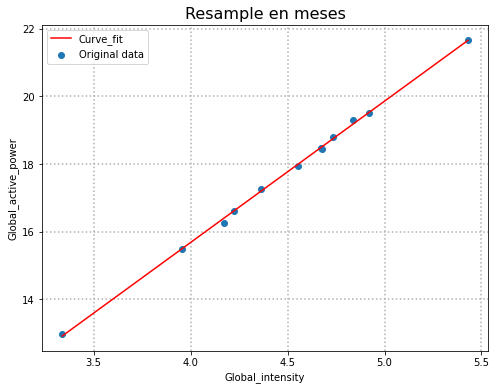

Coeficients are : [ 4.174 -1.011]
Sigma_Coeficients are : [0.043 0.192]
Error on fit is =0.0688


In [13]:
get_fit(func,data["Global_intensity"],data["Global_active_power"],
        "Global_intensity","Global_active_power",3, "Data original en minutos")

get_fit(func,data_d["Global_intensity"],data_d["Global_active_power"],
        "Global_intensity","Global_active_power",3, "Resample en días")

get_fit(func,data_m["Global_intensity"],data_m["Global_active_power"],
        "Global_intensity","Global_active_power",3, "Resample en meses")

# Relación 2: 
$Global$_$active$_$power$ = $A2(Voltage) + B2$

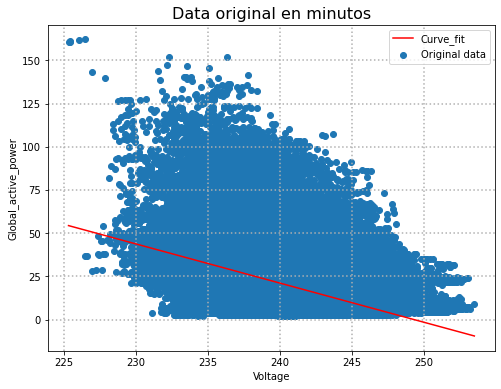

Coeficients are : [ -2.264 564.559]
Sigma_Coeficients are : [0.007 1.772]
Error on fit is =14.1466


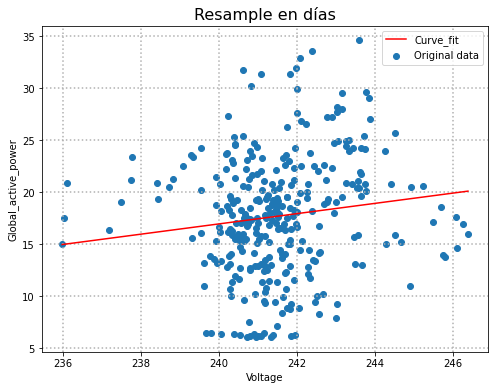

Coeficients are : [   0.494 -101.694]
Sigma_Coeficients are : [ 0.206 49.823]
Error on fit is =5.688


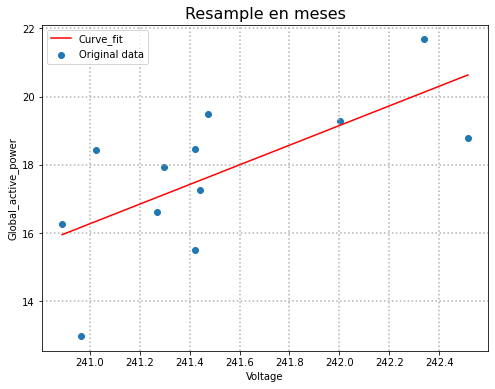

Coeficients are : [   2.88 -677.85]
Sigma_Coeficients are : [  0.999 241.304]
Error on fit is =1.5754


In [14]:
get_fit(func,data["Voltage"],data["Global_active_power"],
        "Voltage","Global_active_power",3, "Data original en minutos")

get_fit(func,data_d["Voltage"],data_d["Global_active_power"],
        "Voltage","Global_active_power",3, "Resample en días")

get_fit(func,data_m["Voltage"],data_m["Global_active_power"],
        "Voltage","Global_active_power",3, "Resample en meses")

# Relación 3.
$Global$_$active$_$power$ = $A31(Global_intensity) + A32(Voltage) + B3$

Coeficients are : [  3.991   0.078 -18.986]
Sigma_Coeficients are : [0.    0.    0.111]
Error on fit is =0.796
Coeficients are : [  4.039   0.103 -25.254]
Sigma_Coeficients are : [0.008 0.007 1.752]
Error on fit is =0.199
Coeficients are : [  4.088   0.135 -33.151]
Sigma_Coeficients are : [0.04  0.041 9.824]
Error on fit is =0.0465


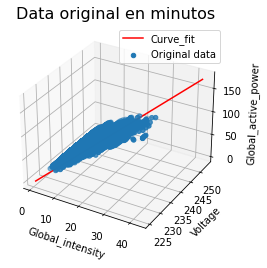

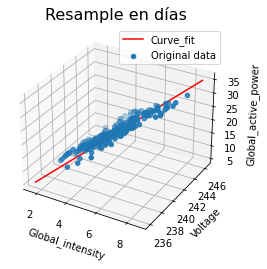

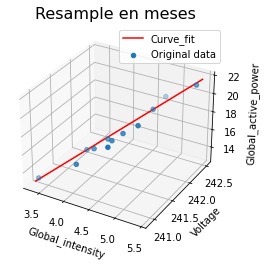

In [17]:
#Minutos
get_fit(func2, (data["Global_intensity"], data["Voltage"]), data["Global_active_power"],
        "Global_intensity","Voltage",3, "Data original en minutos", 
        D3 = True, labelz = "Global_active_power")

#días.
get_fit(func2, (data_d["Global_intensity"], data_d["Voltage"]), data_d["Global_active_power"],
        "Global_intensity","Voltage",3, "Resample en días", 
        D3 = True, labelz = "Global_active_power")

#meses.
get_fit(func2, (data_m["Global_intensity"], data_m["Voltage"]), data_m["Global_active_power"],
        "Global_intensity","Voltage",3, "Resample en meses",
        D3 = True, labelz = "Global_active_power")

### Conclusiones: 
* _Como se puede observar en las gráficas, la mejor relación es la Relación 3, con un error de 0.796, 0.199, 0.0465_

* _y la peor la Relación 2, con un error de 14.1466, 5.688, 1.5754_.

* En general el error es menor con el resample en meses, seguido del de días y por último el original (en minutos).